<a href="https://colab.research.google.com/github/ngrisanti/Age-Prediction-from-Photos/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 181Y Final Project: Age Prediction from Photos**
## Nick Grisanti & Josh Cheung

Our project seeks to create a machine learning model to estimate people's age. We would ideally like to be able to give this model and image of a person and have it return a predicted age. Since it is very difficult to guess someone's age based just on a single image, we don't expect the model to be perfect. However, we would like it to be able to get close to the actual age.

This file in particular retreives, preprocesses the data and saves it as a csv file.

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 197 kB 5.1 MB/s 
     |████████████████████████████████| 60 kB 2.8 MB/s 


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import random
import copy
from matplotlib import pyplot as plt
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Retrieving and Refining the Data

We got this dataset from [Kaggle](https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv?fbclid=IwAR384IVDtUdoea_8hsRJfHLUFIVm8qVOdSNH3_aMw_IEtqzRJoZ9q0kUPkg).

It contains the person's age, a list of pixel values of the image, and some extra information that we will not be using.

In [ ]:
path = "drive/Shareddrives/cs_for_inquiry/"
faces_df = pd.read_csv(path+"labels.csv")
faces_df = faces_df.drop("Unnamed: 0", axis=1)
faces_df.head()

,age,fname
0,1,img_0.jpg
1,1,img_1.jpg
2,1,img_2.jpg
3,1,img_3.jpg
4,1,img_4.jpg


In [ ]:
random.seed(69)

In [ ]:
faces_df = faces_df.sample(frac=0.6).reset_index(drop=True)
len(faces_df)

9956

In [ ]:
def show_image(img):
  plt.imshow(img, cmap="gray")

In [ ]:
faces_df.to_csv("drive/Shareddrives/cs_for_inquiry/select_faces.csv", index=False)

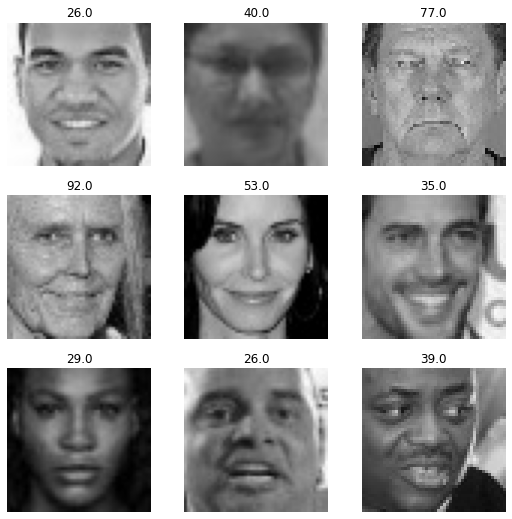

In [ ]:
dls = ImageDataLoaders.from_csv(path=path, csv_fname='select_faces.csv', y_block=RegressionBlock, seed=69, folder='data', fn_col='fname', label_col='age', bs=64, label_cls=Float)
dls.show_batch()

In [ ]:
learn = vision_learner(dls, densenet121)

In [ ]:
learn.fine_tune(20, cbs=[SaveModelCallback(monitor='valid_loss'), ReduceLROnPlateau()], base_lr=0.01)

epoch,train_loss,valid_loss,time
0,282.232147,170.141525,37:18


Better model found at epoch 0 with valid_loss value: 170.1415252685547.


epoch,train_loss,valid_loss,time
0,134.201904,114.143288,01:27
1,106.742279,104.304077,01:37
2,97.404526,101.267662,01:32
3,85.871643,92.541962,01:29
4,79.385811,85.815979,01:28
5,64.111420,81.164169,01:27
6,59.245911,88.022217,01:27
7,52.488564,83.424759,01:29
8,42.561867,78.215363,01:28
9,39.279564,74.820641,01:30


Better model found at epoch 0 with valid_loss value: 114.1432876586914.
Better model found at epoch 1 with valid_loss value: 104.3040771484375.
Better model found at epoch 2 with valid_loss value: 101.26766204833984.
Better model found at epoch 3 with valid_loss value: 92.54196166992188.
Better model found at epoch 4 with valid_loss value: 85.81597900390625.
Better model found at epoch 5 with valid_loss value: 81.16416931152344.
Epoch 6: reducing lr to 0.000493792207892661
Epoch 7: reducing lr to 0.0004753599226210834
Better model found at epoch 8 with valid_loss value: 78.21536254882812.
Better model found at epoch 9 with valid_loss value: 74.82064056396484.
Epoch 10: reducing lr to 0.00035871648493233894
Epoch 11: reducing lr to 0.00030589636940925227
Epoch 12: reducing lr to 0.00025027352329168865
Better model found at epoch 13 with valid_loss value: 72.15859985351562.
Better model found at epoch 14 with valid_loss value: 71.7508544921875.
Better model found at epoch 15 with valid_l

In [ ]:
def img_transform(fname):
  image = cv2.imread(path+f"test/profs/{fname}")
  image = cv2.resize(image, (48,48))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image

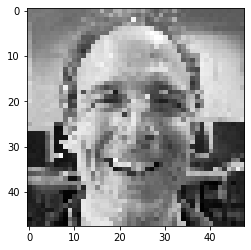

doods is 72.9673 years old!


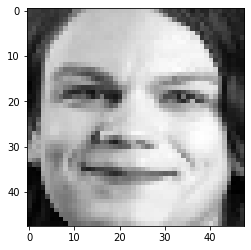

erin is 24.7568 years old!


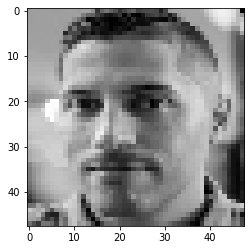

george is 39.2416 years old!


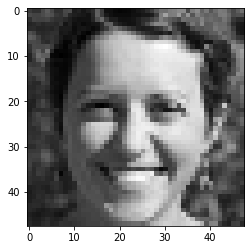

breeden is 46.428 years old!


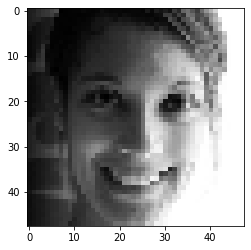

beth is 15.0082 years old!


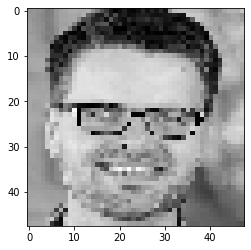

jim is 39.1122 years old!


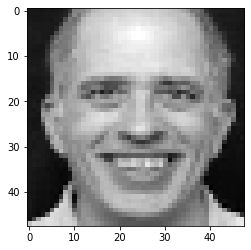

geoff is 34.7569 years old!


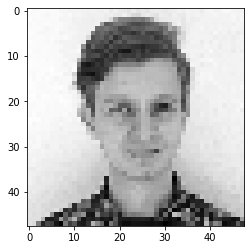

bang is 34.4799 years old!


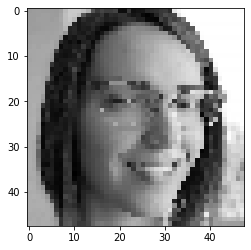

xanda is 17.2049 years old!


In [ ]:
for img in os.listdir(path+"test/profs"):
  image = img_transform(img)
  plt.imshow(image, cmap="gray")
  plt.show()
  prediction,_,probability = learn.predict(image)
  print(f"{img[:-4]} is", round(prediction[0],4), "years old!")

Nice!

In [ ]:
learn.export("age_d121_incomplete.pkl")

In [ ]:
learn = load_learner(path, file="age_d121_incomplete.pkl")

NameError: ignored